In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')
matplotlib.rc('font', family='NanumGothic')

In [2]:
df=pd.read_csv('유방암.csv', engine='python', encoding='949')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_y=df["diagnosis"]
df_x=df.drop('diagnosis',axis=1,inplace=False)

In [5]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_val_x,df_test_x,df_val_y,df_test_y = train_test_split(df_test_x,df_test_y,test_size=0.5,
                                                                       random_state=1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data Y size : {}'.format(df_val_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [7]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print('Accuracy on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(svm_uncustomized.score(df_val_x,df_val_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.667


In [8]:
svm_uncustomized

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
train_accuracy=[]; val_accuracy=[]
para_c=[10**c for c in range(-2,2)]

# para_c

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    val_accuracy.append(svm.score(df_val_x,df_val_y))

df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['ValidationAccuracy']=val_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.621,0.667
1,0.10,0.621,0.667
2,1.00,1.000,0.667
3,10.00,1.000,0.667


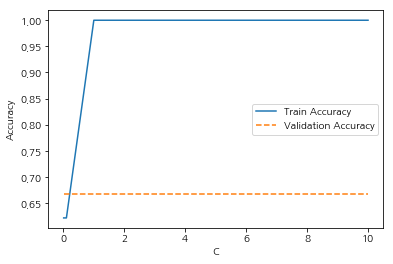

In [11]:
plt.plot(para_c, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_c, val_accuracy, linestyle='--',label='Validation Accuracy')
plt.ylabel('Accuracy');plt.xlabel('C')
plt.legend()

In [12]:
C=0.1

In [13]:
train_accuracy=[]; val_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,2)]

# para_gamma

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C = 0.1, random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    val_accuracy.append(svm.score(df_val_x,df_val_y))

df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValidationAccuracy']=val_accuracy

df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidationAccuracy
0,0.01,0.621,0.667
1,0.10,0.621,0.667
2,1.00,0.621,0.667
3,10.00,0.621,0.667


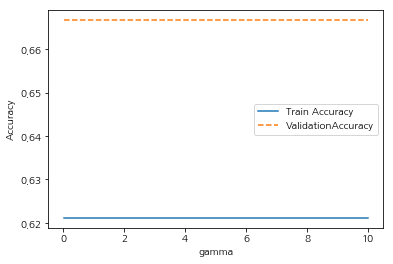

In [14]:
plt.plot(para_gamma, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_gamma, val_accuracy, linestyle='--',label='ValidationAccuracy')
plt.ylabel('Accuracy');plt.xlabel('gamma')
plt.legend()

In [43]:
feature_names=df_train_x.columns
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_x)
df_scaled=pd.DataFrame(df_scaled,columns=feature_names)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [48]:
df_scaled_train_x,df_scaled_test_x = train_test_split(df_scaled,test_size=0.6,random_state=1234)
df_scaled_val_x,df_scaled_test_x = train_test_split(df_scaled_test_x,test_size=0.5,random_state=1234)

print('train data X size : {}'.format(df_scaled_train_x.shape))
print('validation data X size : {}'.format(df_scaled_val_x.shape))
print('test data X size : {}'.format(df_scaled_test_x.shape))

train data X size : (227, 30)
validation data X size : (171, 30)
test data X size : (171, 30)


In [50]:
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(svm_scaled.score(df_scaled_val_x,df_test_y)))

Accuracy on training set:0.996
Accuracy on validation set:0.468


In [51]:
train_accuracy=[]; val_accuracy=[]
para_c=[10**c for c in range(-2,2)]

# para_c

for v_C in para_c:
    svm=SVC(C=v_C, random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(svm.score(df_scaled_val_x,df_val_y))

df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['ValidationAccuracy']=val_accuracy

df_accuracy_c.round(3)

,C,TrainAccuracy,ValidationAccuracy
0,0.01,0.621,0.667
1,0.10,0.965,0.912
2,1.00,0.996,0.936
3,10.00,0.996,0.959


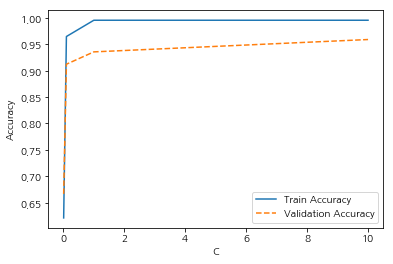

In [52]:
plt.plot(para_c, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_c, val_accuracy, linestyle='--',label='Validation Accuracy')
plt.ylabel('Accuracy');plt.xlabel('C')
plt.legend()

In [53]:
train_accuracy=[]; val_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,2)]

# para_gamma

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C = 1, random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    val_accuracy.append(svm.score(df_scaled_val_x,df_val_y))

df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['ValidationAccuracy']=val_accuracy

df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,ValidationAccuracy
0,0.01,0.978,0.936
1,0.10,0.996,0.912
2,1.00,1.000,0.667
3,10.00,1.000,0.667


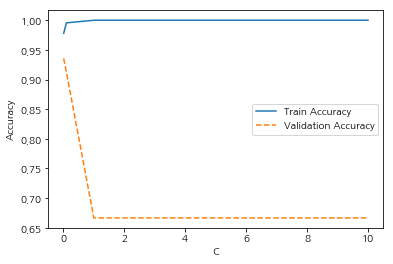

In [54]:
plt.plot(para_c, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_c, val_accuracy, linestyle='--',label='Validation Accuracy')
plt.ylabel('Accuracy');plt.xlabel('C')
plt.legend()

In [55]:
gamma=0.1

In [59]:
svc_final=SVC(C=1, gamma=0.1, random_state=1234)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred=svc_final.predict(df_scaled_val_x)
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(svc_final.score(df_scaled_val_x,df_val_y)))
print('Accuracy on validation set:{:.3f}\n'.format(svc_final.score(df_scaled_test_x,df_test_y)))
print('Confusion matrix \n{}'.format(confusion_matrix(df_val_y,y_pred)))

Accuracy on training set:0.996
Accuracy on validation set:0.912
Accuracy on validation set:0.953

Confusion matrix 
[[108   6]
 [  9  48]]
